## Machine Learning and Statistics Project - Boston House Prices
https://matplotlib.org/

https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155

https://scikit-learn.org/stable/modules/cross_validation.html

https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef

In [6]:
import numpy as np  # import numnerical python with shorthand  
import matplotlib.pyplot as plt  # shorthand import for matplotlib library
import seaborn as sns # import seaborn for advanced graphics
import pandas as pd # import pandas for to take data from table in ncsv file
import sklearn
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline
from matplotlib import rcParams # improved plots from matplotlib
from sklearn.model_selection import train_test_split
from sklearn import svm

In [7]:
# Load library from scikit-learn library
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [8]:
#Print the values of the Boston dataset
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


data: contains the information for various houses

target: prices of the house

feature_names: names of the features

DESCR: describes the dataset

In [9]:
# Give the description of the dataset
print(boston_dataset.data.shape)

(506, 13)


In [10]:
#Print the header of the Boston dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### There is no MEDV value in the dataset
target column it’s available in other attribute called target. So let’s check the shape of the boston.target.

In [12]:
boston['MEDV'] = boston_dataset.target
# Add MEDV value to the dataset

In [13]:
print(boston.head())
# Dataframe with price

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


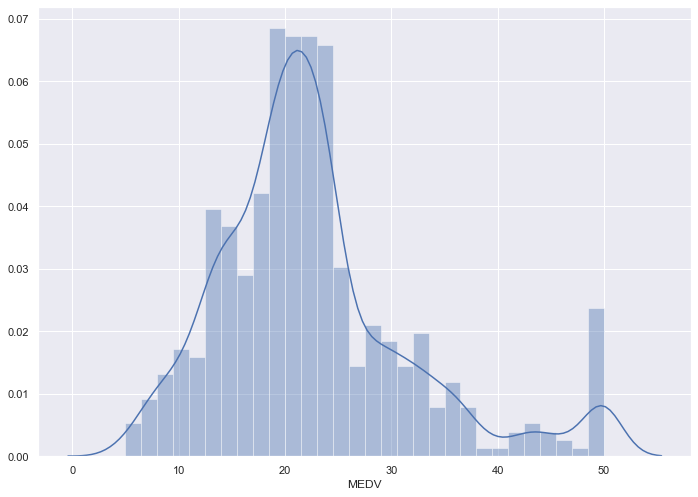

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

## Correlation Heatmap
Heatmap showing the correlation matrix meausing the linear relationships between the variables of the dataset

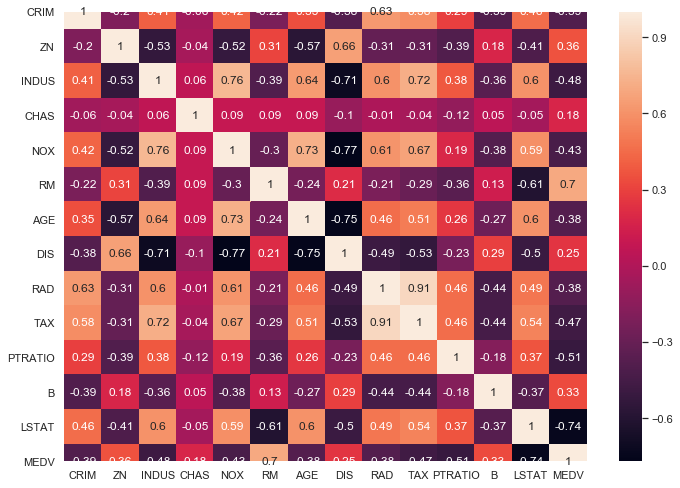

In [15]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

## Observations
The correlation coefficient runs on a scale of -1 to 1, 1 having stong correlation and -1 showing no correlation. MEDV shows a strong cprrelation to the RM value indicating a higher house price for a dwelling with a larger number of rooms. 

It shows negative correlation to LSTAT, lower status withing the population.

## Linear Regression

LSAT (Percentage of lower status of the population) was selected for the linear regression module as it showed the stongest negative correlation with MEDV (Median value of owner-occupied homes in $1000s) in the correlation matrix. It shows that the house prices are negatively correlated linearly with the status within the population.

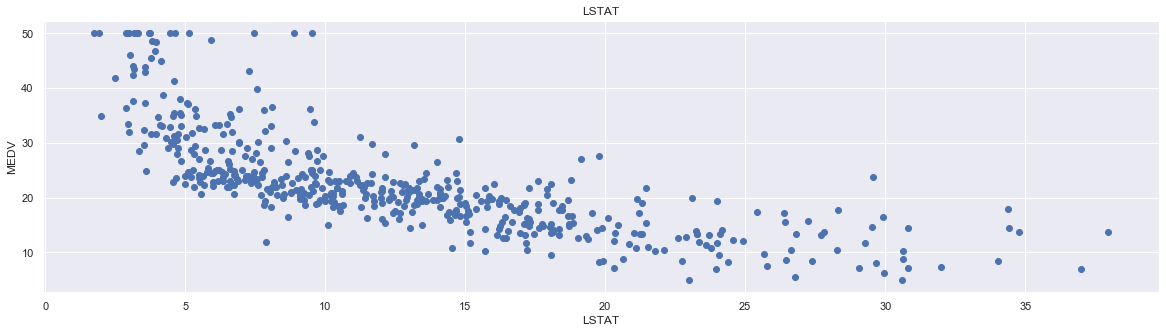

In [16]:
plt.figure(figsize=(20, 5))

features = ['LSTAT']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Positive Correlation


RM (Average number of rooms per dwelling) was selected due to its strong positive correlation with with MEDV (Median value of owner-occupied homes in $1000s) in the correlation matrix. 

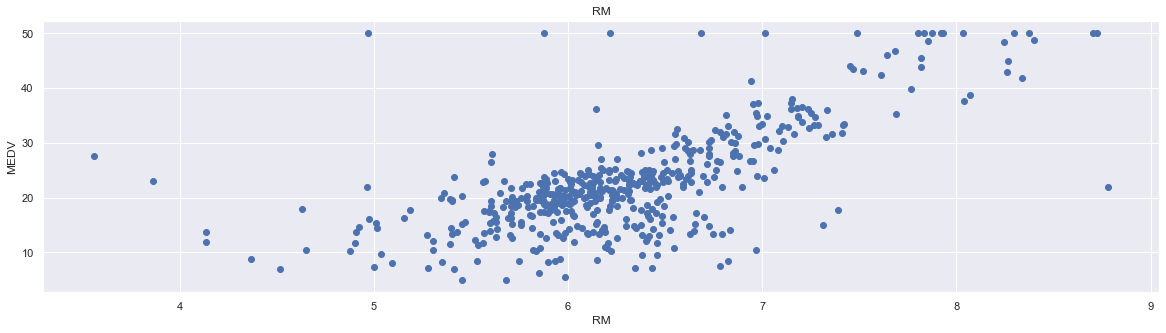

In [17]:
plt.figure(figsize=(20, 5))

features = ['RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
X = boston.drop('MEDV', axis = 1)
Y = boston['MEDV']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


Text(0.5, 1.0, 'Prices vs Predicted prices: $Y_i$ vs $\\hat{Y}_i$')

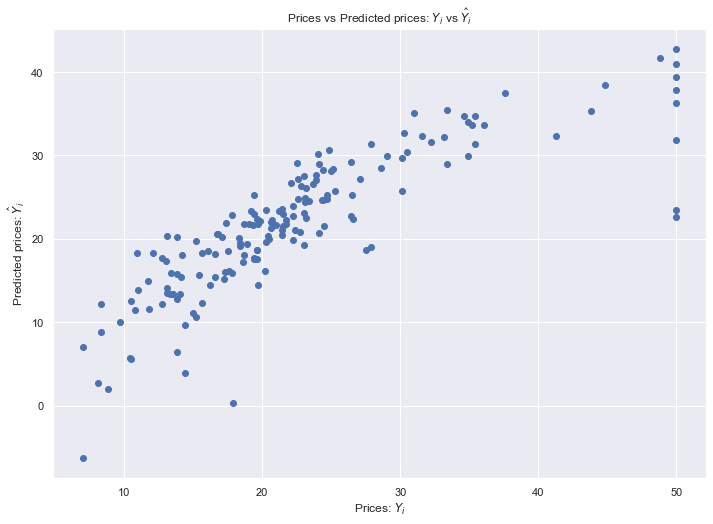

In [21]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

Mean Squared Error

In [22]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.53045876597468


## Observation
House prices generally increase linearly with the number of rooms in the house. There are some outliers in the data. The maximum value in the databases is 50.

<function matplotlib.pyplot.show(*args, **kw)>

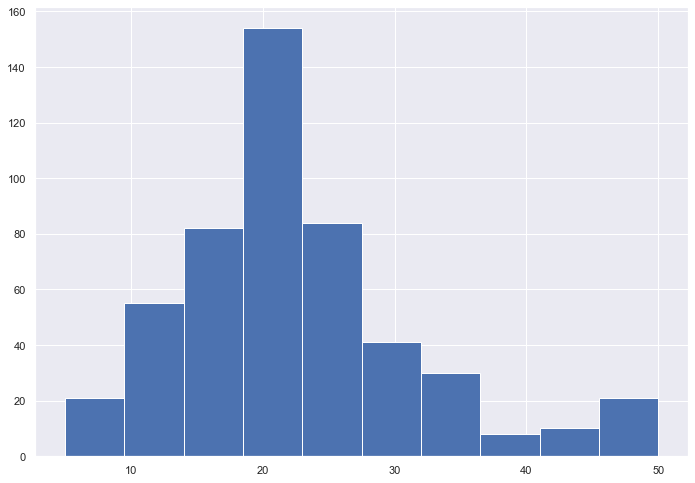

In [23]:
# Histogram of house prices
plt.hist(target)
plt.show

In [24]:
import keras as kr

In [25]:
#create a new neural network
m = kr.models.Sequential()

# Add a single neuron in a single layer, initialised with weight 1 and bias 0
m.add(kr.layers.Dense(1, input_dim=1, activation="linear", kernel_initializer='ones', bias_initializer='zeros'))

# Compile the model
m.compile(loss="mean_squared_error", optimizer="sgd")

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [ ]:
# Create some input values
x =np.arrange(0.0, 10.0, 1)

#Run each x value through the neuaral network

In [ ]:
# Plot the values
plt.plot(x, y, 'k.')